In [2]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv"]
file_time_result_van = "time_van.csv"
file_time_result_dir = "time.csv"
file_time_result_loc = "time_loc.csv"



dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10241.75, 12491.4, 12852.75, 15302.6, 16810.0, 18531.4, 20102.4, 21598.8, 26936.8, 36549.4])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10805.2, 12467.2, 13817.2, 15067.4, 16781.0, 18342.4, 20847.833333333332, 21748.8, 26632.8, 36096.0])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10185.75, 11014.0, 11168.6, 11073.0, 11149.4, 11325.8, 11365.2, 11485.0, 12148.4, 13978.6, 17385.6])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([11036.6, 11570.5, 11560.333333333334, 11246.8, 11188.0, 11454.6, 11499.0, 11643.6, 12332.4, 14359.0, 17755.6])


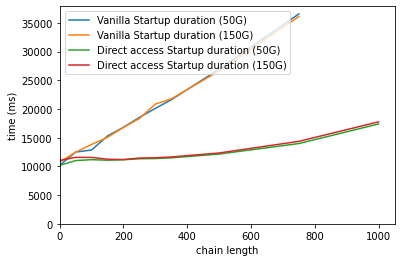

In [204]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pprint
pp = pprint.PrettyPrinter(indent=4)

RESULTS_PATH="/home/nivek/Documents/results_expes"
VANILLA_FILE_PATH=RESULTS_PATH+"/startup/vanilla/time_van_ms"
DIRECT_FILE_PATH=RESULTS_PATH+"/startup/direct_hack/time_dh_ms"

def data_per_disk_from_file(file_path):
    data_per_disk = {}

    with open(file_path, 'r') as datafile:
        lines = datafile.readlines()
        i=0
        snap_nb = -1
        disk_size = -1
        while True:
            unpack_obj = parse.parse("****Snapshots : {} - Disk : {}****\n", lines[i])
            ms = -1
            if unpack_obj != None:
                [snap_nb, disk_size] = unpack_obj
            else:
                unpack_obj = parse.parse("{:d}\n", lines[i])
                if unpack_obj == None: break
                [ms] = unpack_obj

            if disk_size not in data_per_disk.keys():
                data_per_disk[disk_size] = {}

            if snap_nb not in data_per_disk[disk_size].keys():
                data_per_disk[disk_size][snap_nb] = []

            data_per_disk[disk_size][snap_nb] += [ms]


            i += 1
            if i == len(lines):
                break
    return data_per_disk

data_per_disk_vanilla = data_per_disk_from_file(VANILLA_FILE_PATH)
data_per_disk_dh = dpddh= data_per_disk_from_file(DIRECT_FILE_PATH)


for k in data_per_disk_vanilla.keys():
    for kk in data_per_disk_vanilla[k].keys():
        data_per_disk_vanilla[k][kk] = sum(data_per_disk_vanilla[k][kk])/len(data_per_disk_vanilla[k][kk])
    dic = data_per_disk_vanilla[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Vanilla Startup duration ("+k+")")
    
for k in dpddh.keys():
    for kk in dpddh[k].keys():
        dpddh[k][kk] = sum(dpddh[k][kk])/len(dpddh[k][kk])
    dic = dpddh[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Direct access Startup duration ("+k+")")

plt.xlabel("chain length")
plt.ylabel("time (ms)")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.legend()
plt.savefig("figs/startup_duration.pdf", format="pdf", bbox_inches="tight")
plt.show()

171877 0 1648 173608
172359 128404 1570 298914
172954 7473754 748 716221
[100.0, 57.307248564484325, 2.26180991872581] [0.0, 42.692751435515675, 97.73819008127418] [0.9492650108289941, 0.5252346828853784, 0.10443703828846124] [99.050734989171, 99.47476531711462, 99.89556296171153] === df


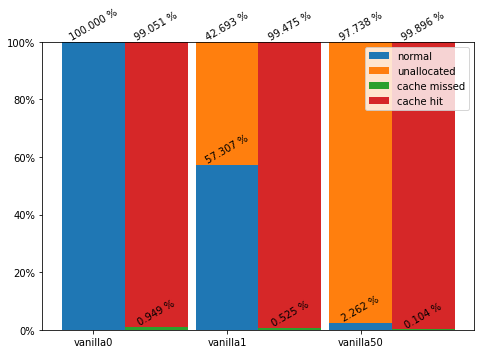

------------------------------------
170917 0 100 173349
171232 127479 1979 301334
172969 170416 3714 346737
172485 170094 4883 348036
173590 170949 5721 353256
[100.0, 57.32363388023876, 50.371740175022204, 50.348970602401195, 50.38326575511045] [0.0, 42.67636611976124, 49.628259824977796, 49.651029397598805, 49.61673424488955] [0.05768709366653399, 0.656746334632003, 1.0711288382837714, 1.403015779976784, 1.6195054011821455] [99.94231290633347, 99.343253665368, 98.92887116171623, 98.59698422002322, 98.38049459881785] === df


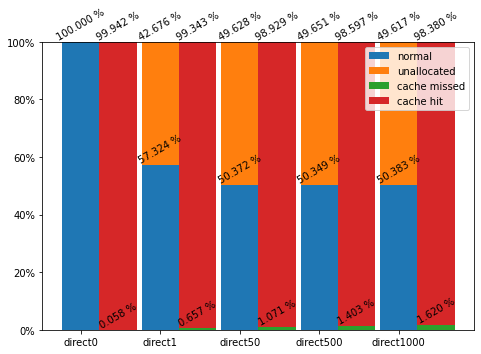

In [6]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]

def get_data(files):
    n = []
    u = []
    cm = []
    cr = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

#         with open(CSV_FILE, 'r') as datafile :
#             csvreader = csv.reader(datafile, delimiter=';', quotechar='|')
#             for row in csvreader:
#                 datas += [row]
#         df = pd.DataFrame(datas, columns=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
    #     #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
#         datan = df[df.event == "NORMAL"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datan)
#         datau = []
#         if len(df[df.event == "UNALLOCATED"]) > 0:
#             datau = df[df.event == "UNALLOCATED"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datau)
        nn = len(df[df.event == "NORMAL"])
        uu = len(df[df.event == "UNALLOCATED"])
        cmm = len(df[df.event == "CACHE_MISSED"]) 
        crr = len(df[df.event == "CACHE_REQ"])
        print(nn, uu, cmm, crr)
        n += [100*nn/(nn+uu)]
        u += [100*uu/(nn+uu)]
        cm += [100*cmm/crr]
        cr += [100*(crr-cmm)/crr]

        del datas
        del temp
        del df
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(len(cols))
    ax.bar(X+0.0, n, width=0.47)
    ax.bar(X+0.0, u, width=0.47, bottom=n)
    ax.bar(X+0.47, cm, width=0.47)
    ax.bar(X+0.47, cr, width=0.47, bottom=cm)
    ax.legend(labels=["normal", "unallocated", "cache missed", "cache hit"])
    print(n, u, cm, cr, "=== df")
    ax.set_xticks(X)
    ax.set_xticklabels(cols)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(100))
    
    rects = ax.patches
    
    # Make some labels.
    tt = n + u + cm + cr
    for i, rect in enumerate(rects):
        label = tt[i]
        label = "{:.3f} %".format(label) if label > 0 else ""
        height = rect.get_height()
        
        ax.text(
            rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", rotation=30
        )
    plt.savefig("figs/number_events_per_chain_"+file[0:2]+".pdf", format="pdf", bbox_inches="tight")
    plt.show()

get_data(files_results_vanilla)
print("------------------------------------")
get_data(files_results_direct)


### Duplication rate

In [ ]:
def filt(g):
    return g.nunique()["snapshot_id"] > 1

def get_data(files):
    val_mean = []
    val_sum = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
        
        df["offset"] = pd.to_numeric(df["offset"])
        df["l2_offset"] = pd.to_numeric(df["l2_offset"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
        df["l1_index"] = pd.to_numeric(df["l1_index"])
        #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
        data = df[ (df.event == "CACHE_MISSED") ].groupby(["event", "offset"]).count()
        print(data)
        data = df[ (df.event == "CACHE_FREE") ].groupby(["event", "offset"]).count()
        print(data)
        
        del datas
        del temp
        del df
        
    print(val_mean)
    print(val_sum)

get_data(["stats_events.csv"]) 

### Events per snapshot given a single chain during a workload

------------------------------------


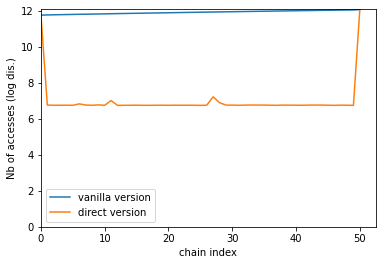

------------------------------------


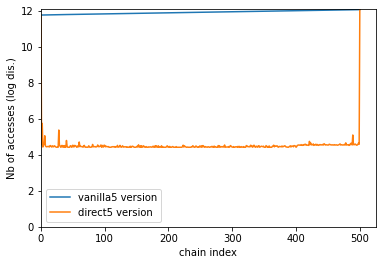

In [143]:
# echelle logarithm on y pour bien voir les données

def get_data(files):
    vals = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
        
        df["offset"] = pd.to_numeric(df["offset"])
        df["l2_offset"] = pd.to_numeric(df["l2_offset"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
        df["l1_index"] = pd.to_numeric(df["l1_index"])
        #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
        data = df[ (df.event == "NORMAL") | (df.event == "UNALLOCATED") ] \
            .groupby(["snapshot_id"])["snapshot_id"].count()
        
        plt.plot(np.log(data), label=file[:-6]+' version')
        
        plt.xlabel("chain index")
        plt.ylabel("Nb of accesses (log dis.)")
        plt.ylim(ymin=0)
        plt.xlim(xmin=0)
        plt.legend()
        
        del datas
        del temp
        del df

get_data(["vanilla50.csv"])
print("------------------------------------")
get_data(["direct50.csv"])

plt.savefig("figs/clusters_accesses_chain_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

get_data(["vanilla500.csv"])
print("------------------------------------")
get_data(["direct500.csv"])
plt.savefig("figs/clusters_accesses_chain_500.pdf", format="pdf", bbox_inches="tight")

### Memory footprint _and_ Throughput

<ipython-input-4-bf492885fe7f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["chain_length"].unique())


  workload        version  chain_length       memory  dd_throughput
0       dd  direct-access             0  4152.250000     553.500000
1       dd  direct-access             1  4151.500000     351.000000
2       dd  direct-access            50  4166.500000     310.750000
3       dd  direct-access           500  4258.500000     320.500000
4       dd  direct-access          1000  4354.250000     311.500000
5       dd        vanilla             0  4121.400000     519.200000
6       dd        vanilla             1  4126.200000     330.000000
7       dd        vanilla            50  4371.166667     355.000000
8       dd        vanilla           500  6561.500000     105.716667
9       dd        vanilla          1000  8643.086000      48.600000


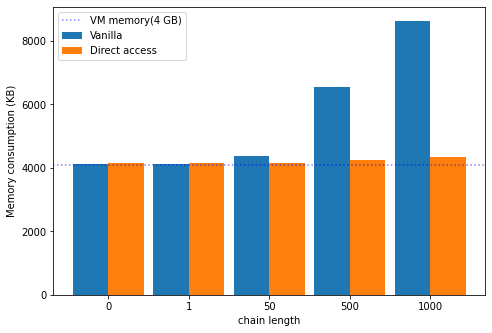

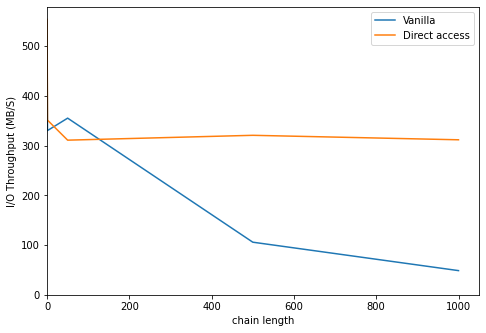

In [4]:
memory_footprint_file = "~/Downloads/memory_footprint.csv"

df = pd.DataFrame()
temp = pd.read_csv(memory_footprint_file, iterator=True, chunksize=900000, delimiter=",")
df = pd.concat(temp, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

X=np.arange(5)
ax.bar(X-0.22, df[df.version == "vanilla"]["memory"].to_numpy(), width=0.44, label="Vanilla")
ax.bar(X+0.22, df[df.version != "vanilla"]["memory"].to_numpy(), width=0.44, label="Direct access")
ax.axhline(4096, alpha=0.5, zorder=1, color="#00f", linestyle=":", label="VM memory(4 GB)")

ax.set_xticklabels(df["chain_length"].unique())
ax.set_xticks(X)
plt.xlabel("chain length")
plt.ylabel("Memory consumption (KB)")
plt.legend()
plt.savefig("figs/memory_consumption.pdf", format="pdf", bbox_inches="tight")

################################################################################################

fig = plt.figure()
ax= fig.add_axes([0,0,1,1])

X=df["chain_length"].unique()

ax.plot(X, df[df.version == "vanilla"]["dd_throughput"].to_numpy(), label="Vanilla")
ax.plot(X, df[df.version != "vanilla"]["dd_throughput"].to_numpy(), label="Direct access")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
 # bar here
plt.xlabel("chain length")
plt.ylabel("I/O Throughput (MB/S)")
plt.legend()
plt.savefig("figs/workload_dd_throughput.pdf", format="pdf", bbox_inches="tight")

print(df)

## Evolution of mean time for hits and misses

Hit ==>
Max:  3264 Median:  34.0 ,Min:  4
Hit ==>
Max:  4082 Median:  36.0 ,Min:  4
Hit ==>
Max:  60304 Median:  525.0 ,Min:  12
Hit ==>
Max:  41628002 Median:  360.0 ,Min:  5


<ipython-input-141-88d9f424688a>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Van base","", "Dir base","", "Van 100","", "Dir 100"])


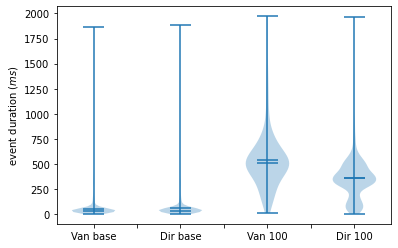

Hit ==>
Max:  78101365 Median:  2.0 ,Min:  2
Hit ==>
Max:  77352021 Median:  2.0 ,Min:  2
Hit ==>
Max:  127335421 Median:  160.0 ,Min:  2
Hit ==>
Max:  95049737 Median:  4.0 ,Min:  2


<ipython-input-141-88d9f424688a>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Van base","", "Dir base","", "Van 100","", "Dir 100"])


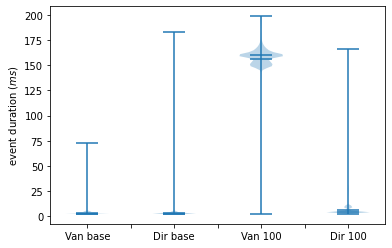

Hit ==>
Max:  4179 Median:  37.0 ,Min:  7
Hit ==>
Max:  3684 Median:  49.0 ,Min:  27
Hit ==>
Max:  107262 Median:  488.0 ,Min:  6
Hit ==>
Max:  41010076 Median:  274.0 ,Min:  4


<ipython-input-141-88d9f424688a>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Van base","", "Dir base","", "Van 100","", "Dir 100"])


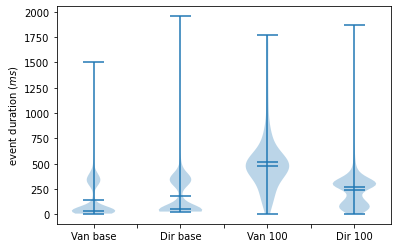

Hit ==>
Max:  66953318 Median:  2.0 ,Min:  2
Hit ==>
Max:  75175382 Median:  3.0 ,Min:  2
Hit ==>
Max:  116295025 Median:  160.0 ,Min:  2
Hit ==>
Max:  45973671 Median:  4.0 ,Min:  2


<ipython-input-141-88d9f424688a>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Van base","", "Dir base","", "Van 100","", "Dir 100"])


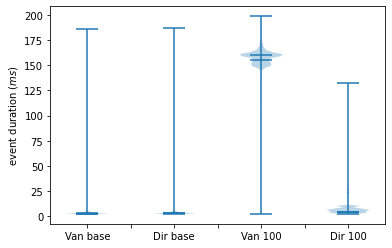

In [141]:

def get_data(files, event):
    
    val = []
    ext = ""
    
    fig, ax = plt.subplots()
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        ext = file[:-4][-3:]

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "snapshot_id", "time"])
        df = pd.concat(temp, ignore_index=True)

        df["time"] = pd.to_numeric(df["time"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
    
        data = df[ (df.event == "UNALLOCATED_"+event) ]["time"]
        print("Hit ==>")
        print("Max: ", data.max(),"Median: ", data.median(),",Min: ", data.min())
        print("============================")
        if event == "HIT":
            data = data[data < 200]
        else:
            data = data[data < 2000]
            #data = np.log(data)
            
        val += [data]
        del temp
        del df
    #ax.boxplot(val)
    pos = [1, 3, 5, 7]
    ax.violinplot(val, points=100, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
    plt.ylabel(r"event duration ($ms$)")
    
    ax.set_xticklabels(["","Van base","", "Dir base","", "Van 100","", "Dir 100"])
    plt.savefig("figs/"+event+"_time_"+ext+".pdf", format="pdf", bbox_inches="tight")
    plt.show()
# time for snapshot 100

get_data(["base_van_hdd.csv", "base_direct_hdd.csv", "time_van_100_hdd.csv", "time_direct_100_hdd.csv"], "MISSED")
get_data(["base_van_hdd.csv", "base_direct_hdd.csv", "time_van_100_hdd.csv", "time_direct_100_hdd.csv"], "HIT")



get_data(["base_van_ssd.csv", "base_direct_ssd.csv", "time_van_100_ssd.csv", "time_direct_100_ssd.csv"], "MISSED")
get_data(["base_van_ssd.csv", "base_direct_ssd.csv", "time_van_100_ssd.csv", "time_direct_100_ssd.csv"], "HIT")

/home/nivek/Downloads/fio_cache
{'vanilla': [88.0, 393.0, 456.0, 376.0, 402.0, 431.0, 411.0, 508.0, 678.0, 988.0, 1088.0, 1178.0, 1228.0], 'direct': [2850.0, 3000.0, 3050.0, 4323.0, 4426.0, 5208.0, 5553.0, 5373.0, 5150.0, 5418.0, 5387.0, 5700.0, 6000.0]}


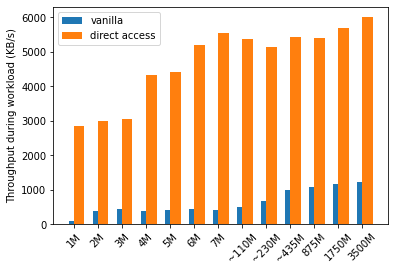

In [5]:
file1="/home/nivek/Downloads/dd_cache_none_4K"
file2="/home/nivek/Downloads/dd_cache_writethrough_4K"
file3="/home/nivek/Downloads/dd_cache_none_2K"
file4="/home/nivek/Downloads/dd_cache_writethrough_2K"
file5="/home/nivek/Downloads/fio_cache"

def plot(file, t=True):
    
    fig, ax = plt.subplots()
    with open(file, 'r') as datafile:
        lines = datafile.readlines()
        t = ""
        datas = {"vanilla": [], "direct": []}
        for line in lines:
            if "vanilla" in line:  t="vanilla"
            elif "direct" in line: t="direct"
            else:
                datas[t] += [float(line.split()[0])]
        print(file)
        print(datas)
        
        X = np.arange(13)
        xx = ["1M", "2M", "3M", "4M", "5M", "6M", "7M", "~110M", "~230M", "~435M", "875M", "1750M", "3500M"]
        plt.bar(xx, datas["vanilla"], width=0.44, label="vanilla")
        plt.bar(X+0.22, datas["direct"], width=0.44, label="direct access")
        plt.ylim(ymin=0)
        plt.ylabel("Throughput during workload (KB/s)")
        plt.legend()
        plt.savefig("figs/cache_variation.pdf", format="pdf", bbox_inches="tight")
        plt.xticks(rotation=45)
        #plt.xlim(xmin=0)
        #ax.set_xticklabels(xx)

# plot(file1)
# plt.show()
# plot(file2)
# plt.show()
# plot(file3)
# plt.show()
# plot(file4)
plot(file5)


# only vanilla base
# nfs without cache
# or drop cache everytime on nfs server
# use another workload for random read (like fio)
# test 512K
# how to partitoin real workloadc in rocksdb
# calculate taux de duplication with ponderation

# fio --filename=/dev/XXX --direct=1 --rw=randread --randrepeat=1 percentage_random=70 \               
#    --ioengine=libaio --bs=4k --iodepth=32 --numjobs=1 --size=20G \             
#    --name=randread.4k.out --runtime=180
            

real_dupli


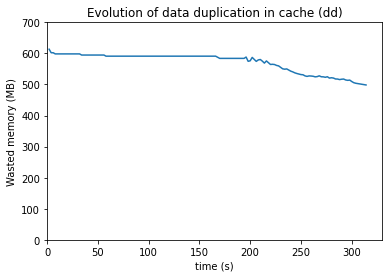

In [7]:

def get_data(file):
    
    val = []
    ext = ""
    
    fig, ax = plt.subplots()
    
    CSV_FILE = MICRO_METRICS_DIR + file 
    ext = file[:-4]
    print(ext)

    df = pd.DataFrame()
    temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=",",
                      names=["time", "nb_dup", "per_dup"])
    df = pd.concat(temp, ignore_index=True)
    
    X=df["time"]

    ax.plot(X/5, df["per_dup"].to_numpy()*100*7, label="Percentage duplication")
    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=700)
     # bar here
    plt.xlabel("time (s)")
    plt.ylabel("Wasted memory (MB)")
    plt.savefig("figs/dupli_memory.pdf", format="pdf", bbox_inches="tight")
    plt.title("Evolution of data duplication in cache (dd)")

get_data("real_dupli.csv")